# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
    <li>Conservation of engery applied to the system</li>
    <li>There is no energy generation in the control volume</li>
</ul>

We need to find the Pipe's surface area for the problem's control area/surface. This is given by the equation $Sa = L \pi D = 2.5 m^2$. The heat is transferred from the surface to the insulation by conduction. Conservation of energy is given by this equation.

$$
q_{loss} -q_{cond} = 0
$$

Where

$$
q_{loss} = -kA\frac{T_{ins} - T_{pipe}}{L_{ins}}
$$

and

$$
q_{cond} = -kA\frac{T_{pipe} - T_{ins}}{L_{ins}}
$$

Now, for 25m of insulation, the cost would be equal to $13.84\frac{25}{0.914}+7.06$. Given that the furnace has a efficiency of 90% $(\eta = 0.9)$ the yearly savings would be the cost of running the furnace with no insulation minus the cost of the furnace.

$$
C_{save} = C_{no-ins}- C_{furn}
$$



Text(0, 0.5, 'Annual Savings on Wasted Gas ($)')

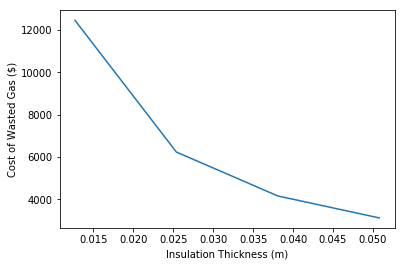

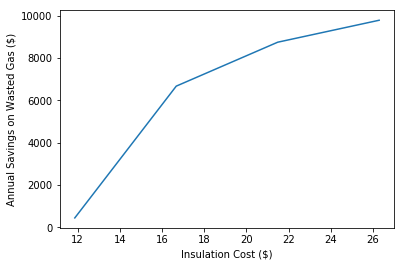

In [2]:

k = 0.23 #W/(m.K)
D = 0.1 #m
L = 25. #m
T_pipe = 150. #C
T_ins = 25. #C
Sa = L*np.pi*D #m^2
eta = 0.9 #eff
C_no_ins = (((18405*31536000)/eta)/1000000)*0.02 #cost no insulation
L_ins = [0.0127, 0.0254, 0.0381, 0.0508]
C_ins = [(25./0.914)*13.84*L_ins[0]+7.06, (25./0.914)*13.84*L_ins[1]+7.06, (25./0.914)*13.84*L_ins[2]+7.06, (25./0.914)*13.84*L_ins[3]+7.06]
q_loss = [-k*Sa*((T_ins-T_pipe)/(L_ins[0])), -k*Sa*((T_ins-T_pipe)/(L_ins[1])), -k*Sa*((T_ins-T_pipe)/(L_ins[2])), -k*Sa*((T_ins-T_pipe)/(L_ins[3]))]
C_furn = [(((q_loss[0]*31536000)/eta)/1000000)*0.02, (((q_loss[1]*31536000)/eta)/1000000)*0.02, (((q_loss[2]*31536000)/eta)/1000000)*0.02, (((q_loss[3]*31536000)/eta)/1000000)*0.02]
C_save = [C_no_ins-C_furn[0], C_no_ins-C_furn[1], C_no_ins-C_furn[2], C_no_ins-C_furn[3]]

plot1 = plt.figure(1)
plt.plot(L_ins, C_furn)
plt.xlabel('Insulation Thickness (m)')
plt.ylabel('Cost of Wasted Gas ($)')

plot2 = plt.figure(2)
plt.plot(C_ins, C_save)
plt.xlabel('Insulation Cost ($)')
plt.ylabel('Annual Savings on Wasted Gas ($)')

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
    <li>Radiation is neglagible</li>
    <li>Conservation of Energy is applied to the system</li>
</ul>

We need to find the resistance of heat transfer for a single pane window, a single pane window with a storm door and a double paned window.

1 pane

$$
R_{tot1} = R_{conv-in}+R_{conv-out}+R_{cond-glass} \\
R_{conv-in}=\frac{1}{h_{in}A} \\
R_{cond-glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{conv-out}=\frac{1}{h_{out}A} \\
$$

1 pane with storm door

$$
R_{tot2}=R_{conv-in}+R_{cond-glass}+R_{conv-storm}+R_{cond-glass}+R_{conv-out} \\
R_{conv-in}=\frac{1}{h_{in}A} \\
R_{cond-glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{conv-storm}=\frac{1}{h_{storm}A}\\
R_{conv-out}=\frac{1}{h_{out}A} \\
$$

2 pane

$$
R_{tot3}=R_{conv-in}+R_{cond-glass}+R_{cond-space}+R_{cond-glass}+R_{conv-out} \\
R_{conv-in}=\frac{1}{h_{in}A} \\
R_{cond-glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{cond-space}=\frac{t_{space}}{k_{space}A} \\
R_{conv-out}=\frac{1}{h_{out}A} \\
$$

In [3]:
T_in = 15. #C
T_out = -10. #C
height = 1 #m
width = 0.5 #m
A = height*width #m^2
h_in = 8.75 #W/m^2.C
h_out = 41 #W/m^2.C
h_storm = 19 #W/m^2.C
t_glass = 0.003 #m
t_space = 0.005 #m
k_glass = 0.92 #W/m.C
k_space = 0.003 #W/m.C
R_conv_in = 1/(h_in*A) #C/W
R_conv_out = 1/(h_out*A) #C/W
R_cond_glass = t_glass/(k_glass*A) #C/W
R_conv_storm = 1/(h_storm*A) #C/W
R_cond_space = t_space/(k_space*A) #C/W
R_1 = R_conv_in+R_cond_glass+R_conv_out #C/W
R_storm = R_conv_in+R_cond_glass+R_conv_storm+R_cond_glass+R_conv_out #C/W
R_2 = R_conv_in+R_cond_glass+R_cond_space+R_cond_glass+R_conv_out #C/W
q_1 = (T_in-T_out)/R_1 #W
q_storm = (T_in-T_out)/R_storm #W
q_2 = (T_in-T_out)/R_2 #W

print('The rate of heat transfer for the single pane window is %0.2fW' %q_1)
print('The rate of heat transfer for the single pane with storm window is %0.2fW' %q_storm)
print('The rate of heat transfer for the double pane window is %0.2fW' %q_2)

The rate of heat transfer for the single pane window is 88.07W
The rate of heat transfer for the single pane with storm window is 63.19W
The rate of heat transfer for the double pane window is 6.90W
